In [110]:
# import sqlalchemy
import sqlite3
import pandas as pd

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
# Connect to SQLite database
connection = sqlite3.connect(r'../data/vivino.db')
# Create a cursor object
cursor = connection.cursor()

In [112]:
cursor.execute("""
    SELECT *
    FROM countries
    LIMIT 10;
""")
cursor.fetchall()

[('it', 'Italie', 563, 4270717, 274658, 42399),
 ('fr', 'France', 1306, 5973301, 422503, 67553),
 ('us', 'États-Unis', 362, 12273684, 204060, 28145),
 ('es', 'Espagne', 152, 2264396, 102662, 18026),
 ('pt', 'Portugal', 93, 1123535, 39847, 5834),
 ('au', 'Australie', 120, 1022965, 90954, 13946),
 ('hu', 'Hongrie', 29, 102235, 16605, 1923),
 ('za', 'Afrique du Sud', 112, 269649, 30857, 4227),
 ('de', 'Allemagne', 236, 2549989, 164533, 13643),
 ('cl', 'Chili', 41, 326757, 41191, 5785)]

In [113]:
query = """
    SELECT countries.code AS country_code, 
           countries.name AS country_name, 
           regions.name AS region,
           wines.name AS wine,
           wineries.name AS winery
    FROM countries
        JOIN regions ON countries.code = regions.country_code
        JOIN wines ON regions.id = wines.region_id
        LEFT JOIN wineries ON wines.winery_id = wineries.id
    WHERE countries.code = 'es';
"""
countries_df = pd.read_sql_query(query, connection)
print(countries_df.shape)
display(countries_df.head())

(94, 5)


,country_code,country_name,region,wine,winery
0,es,Espagne,Rioja,Rioja 150 Aniversario,None
1,es,Espagne,Rioja,Torre Muga,None
2,es,Espagne,Ribera del Duero,Gran Reserva Ribera del Duero,None
3,es,Espagne,Rioja,Gran Reserva 890,None
4,es,Espagne,Rioja,Castillo Ygay Gran Reserva Especial Tinto,None


In [114]:
query_wineries = """ 
    SELECT name
    FROM wineries;
"""
wineries_df = pd.read_sql_query(query_wineries, connection)
print(wineries_df.shape)
display(wineries_df.head())

(1020, 1)


,name
0,Vin Santo di Montepulciano
1,St. Henri Shiraz
2,Siepi
3,Solare Toscana
4,Tenuta Tignanello 'Solaia'


# Wine rating by country

In [130]:
query_wine_ratings_by_country = """
    SELECT countries.code AS code, 
           countries.name AS country_name,  
           ROUND(AVG(wines.ratings_average), 2) AS rating
    FROM countries
        JOIN regions ON countries.code = regions.country_code
        JOIN wines ON regions.id = wines.region_id
    GROUP BY code
    ORDER BY rating DESC;
"""
df_wine_ratings_by_country = pd.read_sql_query(query_wine_ratings_by_country, connection)
print(df_wine_ratings_by_country.shape)
display(df_wine_ratings_by_country.head())

(17, 3)


,code,country_name,rating
0,il,Israël,4.50
1,de,Allemagne,4.50
2,us,États-Unis,4.49
3,md,Moldavie,4.48
4,hu,Hongrie,4.47


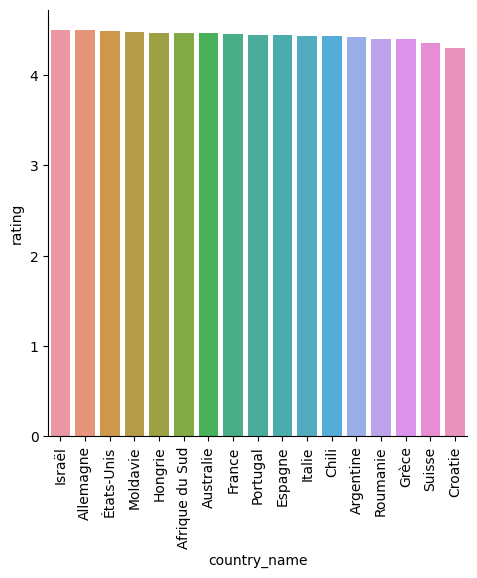

<Figure size 640x480 with 0 Axes>

In [136]:
g1 = sns.catplot(
	x = "country_name",
	y = "rating",
	data = df_wine_ratings_by_country,
	kind = "bar"
)
g1.tick_params(axis="x", rotation=90)
plt.show()
plt.clf()

# Vintage rating by country

In [140]:
query_vintage_ratings_by_country = """
    SELECT countries.code AS code, 
           countries.name AS country_name,  
           ROUND(AVG(vintages.ratings_average), 2) AS rating
    FROM countries
        JOIN regions ON countries.code = regions.country_code
        JOIN wines ON regions.id = wines.region_id
        JOIN vintages ON wines.id = vintages.wine_id
    GROUP BY code
    ORDER BY rating DESC
    LIMIT 10;
"""
df_vintage_ratings_by_country = pd.read_sql_query(query_vintage_ratings_by_country, connection)
print(df_vintage_ratings_by_country.shape)
display(df_vintage_ratings_by_country.head())

(10, 3)


,code,country_name,rating
0,ro,Roumanie,4.50
1,hr,Croatie,4.40
2,ar,Argentine,4.32
3,cl,Chili,4.12
4,pt,Portugal,3.93


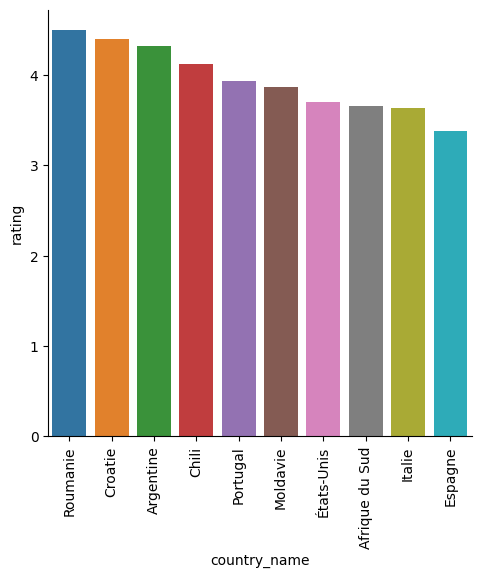

<Figure size 640x480 with 0 Axes>

In [141]:
g2 = sns.catplot(
	x = "country_name",
	y = "rating",
	data = df_vintage_ratings_by_country,
	kind = "bar"
)
g2.tick_params(axis="x", rotation=90)
plt.show()
plt.clf()